In [103]:
%pip install -r requirements.txt


   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   -- ------------------------------------- 1.6/24.0 MB 9.3 MB/s eta 0:00:03
   ------- -------------------------------- 4.5/24.0 MB 11.7 MB/s eta 0:00:02
   ------------- -------------------------- 8.4/24.0 MB 13.7 MB/s eta 0:00:02
   --------------------- ------------------ 12.8/24.0 MB 15.8 MB/s eta 0:00:01
   ----------------------------- ---------- 17.8/24.0 MB 17.8 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 19.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ------ --------------------------------- 7.3/45.9 MB 37.8 MB/s eta 0:00:02
   -------------- ------------------------- 16.8/45.9 MB 40.7 MB/s eta 0:00:01
   ---------------------- ----------------- 25.7/45.9 MB 41.8 MB/s eta 0:00:01
   ------------------------------ --------- 35.4/45.9 MB 42.4 MB/s eta 0:00:01
   -------------------------------------- - 44.6/45.9 MB 42.3 MB/s eta 0:0

  You can safely remove it manually.
  You can safely remove it manually.


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [105]:
annotated_emails = pd.read_csv('./data/annotated/annotated_emails.csv')
enron_emails = pd.read_csv('./data/raw/enron-email-dataset/emails.csv')

In [106]:
# Merge the 'annotated_emails' DataFrame with the 'enron_emails' DataFrame by index
enron_emails['label'] = annotated_emails['label']
labelled_enron_emails = enron_emails[enron_emails['label'].notna()]
labelled_enron_emails.to_csv('./data/labelled/labelled_enron_emails.csv', index=False)

### Produce the parsed emails by running the enron_parser.ipynb file with the emails.csv file as the input


In [107]:
# Load the parsed emails
parsed_enron_emails = pd.read_csv('./data/parsed/parsed_emails.csv')
parsed_enron_emails.head()

,file,message,label,sender_email,subject,num_receivers,email_length,email_domain,sent_time,is_forwarded
0,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,1.0,phillip.allen@enron.com,NaN,1,16,enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0
1,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,1.0,phillip.allen@enron.com,Re: Hello,1,3,enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",0
2,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...,1.0,phillip.allen@enron.com,Re: Hello,1,6,enron.com,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",0
3,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...,1.0,phillip.allen@enron.com,NaN,2,24,enron.com,"Tue, 22 Aug 2000 07:44:00 -0700 (PDT)",0
4,allen-p/_sent_mail/1004.,Message-ID: <17189699.1075863688308.JavaMail.e...,1.0,phillip.allen@enron.com,Re: PRC review - phone calls,1,2,enron.com,"Fri, 14 Jul 2000 06:59:00 -0700 (PDT)",0


In [108]:
# Reorder columns to ensure the label column is the last one, drop the 'message' and 'file' columns
column_order = [col for col in parsed_enron_emails.columns if col not in ['label', 'message', 'file', 'sender_email']] + ['label']
final_dataset = parsed_enron_emails.loc[:, column_order]

# Convert 'label' column to integer type using .loc to avoid SettingWithCopyWarning
final_dataset.loc[:, 'label'] = final_dataset['label'].astype(int)

# Save the final dataset
final_dataset.to_csv('./data/final/final_dataset.csv', index=False)

In [109]:
# Read the final dataset
final_dataset = pd.read_csv('./data/final/final_dataset.csv')

# Display the first few rows of the dataset
print("Head of the final dataset:")
final_dataset.head()

Head of the final dataset:


,subject,num_receivers,email_length,email_domain,sent_time,is_forwarded,label
0,NaN,1,16,enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0,1.0
1,Re: Hello,1,3,enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",0,1.0
2,Re: Hello,1,6,enron.com,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",0,1.0
3,NaN,2,24,enron.com,"Tue, 22 Aug 2000 07:44:00 -0700 (PDT)",0,1.0
4,Re: PRC review - phone calls,1,2,enron.com,"Fri, 14 Jul 2000 06:59:00 -0700 (PDT)",0,1.0


In [110]:
# Display the shape of the dataset
print("Shape of the final dataset:")
final_dataset.shape

Shape of the final dataset:


(5028, 7)

In [111]:
# Summary statistics of the dataset
print("Summary statistics of the final dataset:")
final_dataset.describe()

Summary statistics of the final dataset:


,num_receivers,email_length,is_forwarded,label
count,5028.000000,5028.000000,5028.000000,5028.000000
mean,2.262331,97.209427,0.036197,0.823389
std,10.217634,200.510950,0.186799,0.381377
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,17.000000,0.000000,1.000000
50%,1.000000,45.000000,0.000000,1.000000
75%,1.000000,109.000000,0.000000,1.000000
max,349.000000,5479.000000,1.000000,1.000000


In [112]:
# Check for missing values
print("Missing values in the final dataset:")
final_dataset.isnull().sum()

Missing values in the final dataset:


subject          1260
num_receivers       0
email_length        0
email_domain        0
sent_time           0
is_forwarded        0
label               0
dtype: int64

In [113]:
# Display the distribution of the label
print("Distribution of the label:")
final_dataset['label'].value_counts()

Distribution of the label:


label
1.0    4140
0.0     888
Name: count, dtype: int64

Percentage of each class in the 'label' column:
label
1.0    82.338902
0.0    17.661098
Name: count, dtype: float64


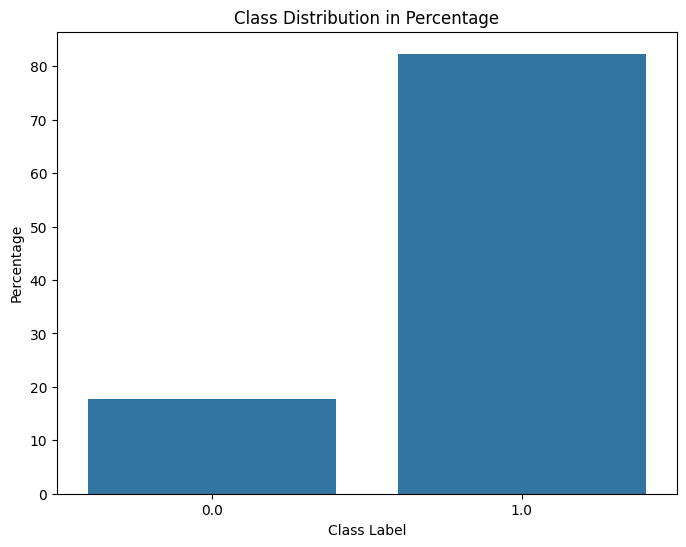

In [114]:
# Calculate the percentage of each class in the 'label' column
class_counts = final_dataset['label'].value_counts()
total_counts = class_counts.sum()
class_percentages = (class_counts / total_counts) * 100

# Print the class percentages
print("Percentage of each class in the 'label' column:")
print(class_percentages)

# Plot the class imbalance
plt.figure(figsize=(8, 6))
sns.barplot(x=class_percentages.index, y=class_percentages.values)
plt.title('Class Distribution in Percentage')
plt.xlabel('Class Label')
plt.ylabel('Percentage')
plt.show()

In [96]:
# Check if there is a significant class imbalance
class_counts = final_dataset['label'].value_counts()
if min(class_counts) / max(class_counts) < 0.5:
    print("Significant class imbalance detected.")
else:
    print("No significant class imbalance detected.")

Significant class imbalance detected.


In [97]:
from sklearn.model_selection import train_test_split

X = final_dataset.iloc[:, :-1]  # All columns except the last one
y = final_dataset.iloc[:, -1]   # The last column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import gensim.downloader as api
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the GloVe model from Gensim's data repository
glove_model = api.load("glove-wiki-gigaword-100")  # This loads the 100-dimensional GloVe model

# Function to convert text to GloVe vectors
def text_to_glove(text):
    words = text.split()
    word_vectors = [glove_model.get_vector(word) if word in glove_model else np.zeros(100) for word in words]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

# Apply GloVe vectorization to 'subject' column
final_dataset['subject'] = final_dataset['subject'].fillna('').apply(text_to_glove)

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000, stop_words='english', min_df=5, max_df=0.95)

# Create TF-IDF features from 'email_domain' column, handling NaN values
email_domain_tfidf = tfidf.fit_transform(final_dataset['email_domain'].fillna(''))
email_domain_features = pd.DataFrame(email_domain_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Merge TF-IDF features back into the main dataset
final_dataset = pd.concat([final_dataset, email_domain_features], axis=1)

# Initialize label encoders for columns with relatively fewer unique values
label_encoders = {col: LabelEncoder() for col in ['email_domain']}

# Apply label encoding
for col in label_encoders:
    final_dataset[col] = label_encoders[col].fit_transform(final_dataset[col])

# Convert 'sent_time' to datetime
final_dataset['sent_time'] = pd.to_datetime(final_dataset['sent_time'])

[==================================================] 100.0% 128.1/128.1MB downloaded


C:\Users\Akshay Dongare\AppData\Local\Temp\ipykernel_16628\2322161480.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_dataset['sent_time'] = pd.to_datetime(final_dataset['sent_time'])
C:\Users\Akshay Dongare\AppData\Local\Temp\ipykernel_16628\2322161480.py:37: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  final_dataset['sent_time'] = pd.to_datetime(final_dataset['sent_time'])


In [116]:
final_dataset.head()

,subject,num_receivers,email_length,email_domain,sent_time,is_forwarded,label,accenture,amazon,anchordesk,...,org,response,rr,salomonsmithbarney,state,uu,winstead,wsj,yahoo,zdlists
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,16,29,2000-10-23 06:13:00-07:00,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,3,29,2000-08-31 05:07:00-07:00,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,6,29,2000-08-31 04:17:00-07:00,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,24,29,2000-08-22 07:44:00-07:00,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[-0.35894766201575595, -0.04244516727825006, 0...",1,2,29,2000-07-14 06:59:00-07:00,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# Handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

# Ensure that all features are numeric for SMOTE
# Convert any non-numeric columns to numeric if necessary
X_train_numeric = X_train.copy()
for col in X_train_numeric.select_dtypes(include=['object']).columns:
    X_train_numeric[col] = X_train_numeric[col].astype('category').cat.codes

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_numeric, y_train)

# Print the new class distribution after applying SMOTE
print("New class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


New class distribution after SMOTE:
label
1.0    3293
0.0    3293
Name: count, dtype: int64


In [121]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


Epoch 1/20


c:\AkshayTools\Miniconda3\envs\g6_alda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5355 - loss: 66.9598 - val_accuracy: 0.3589 - val_loss: 5.1123
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5304 - loss: 16.9900 - val_accuracy: 0.0281 - val_loss: 0.8898
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5256 - loss: 5.3590 - val_accuracy: 0.5736 - val_loss: 0.6891
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5784 - loss: 2.0783 - val_accuracy: 0.0000e+00 - val_loss: 0.7318
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5891 - loss: 1.4091 - val_accuracy: 0.0000e+00 - val_loss: 0.7838
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5932 - loss: 1.1334 - val_accuracy: 0.0000e+00 - val_loss: 0.8140
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5977 - loss: 1.0309 - val_accuracy: 0.0000e+00 - val_loss: 0.7964
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6040 - loss: 0.8980 - val_accuracy: 0.0000e+00 

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of email lengths
plt.figure(figsize=(10, 6))
sns.histplot(parsed_enron_emails['email_length'], kde=True, color='blue', binwidth=100)
plt.title('Distribution of Email Lengths')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.show()

# Plotting the number of receivers in emails
plt.figure(figsize=(10, 6))
sns.countplot(x='num_receivers', data=parsed_enron_emails)
plt.title('Distribution of Number of Receivers')
plt.xlabel('Number of Receivers')
plt.ylabel('Count')
plt.show()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = parsed_enron_emails.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()
